<a href="https://colab.research.google.com/github/FTLegadima/alx-higher_level_programming/blob/master/data_sciences_1st_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

USE CASE IMPLEMATENTION OF LINEAR REGRASSION  

1. Import libraries

In [44]:
# IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

2.Load the dataset and extract independent and dependent variable:

In [45]:
import pandas as pd

# Manually defining the dataset with Gauteng cities
data = {
    "R&D Spend": [165349.2, 162597.7, 153441.51, 144372.41, 142107.34,
                  131876.9, 134615.46, 130298.13, 120542.52, 123334.88],
    "Administration": [136897.8, 151377.59, 101145.55, 118671.85, 91391.77,
                       99814.71, 147198.87, 145530.06, 148718.95, 108679.17],
    "Marketing Spend": [471784.1, 443898.53, 407934.54, 383199.62, 366168.42,
                        362861.36, 127716.82, 323876.68, 311613.29, 304981.62],
    "City": ["Johannesburg", "Pretoria", "Soweto", "Johannesburg", "Soweto",
             "Johannesburg", "Pretoria", "Soweto", "Johannesburg", "Pretoria"],
    "Profit": [192261.83, 191792.06, 191050.39, 182901.99, 166187.94,
               156991.12, 156122.51, 155752.6, 152211.77, 149759.96]
}

# Create the DataFrame
companies = pd.DataFrame(data)

# Extract independent variables (all columns except the last one)
X = companies.iloc[:, :-1].values

# Extract dependent variable (last column: Profit)
Y = companies.iloc[:, -1].values

# Display the first few rows
print(companies.head())



   R&D Spend  Administration  Marketing Spend          City     Profit
0  165349.20       136897.80        471784.10  Johannesburg  192261.83
1  162597.70       151377.59        443898.53      Pretoria  191792.06
2  153441.51       101145.55        407934.54        Soweto  191050.39
3  144372.41       118671.85        383199.62  Johannesburg  182901.99
4  142107.34        91391.77        366168.42        Soweto  166187.94


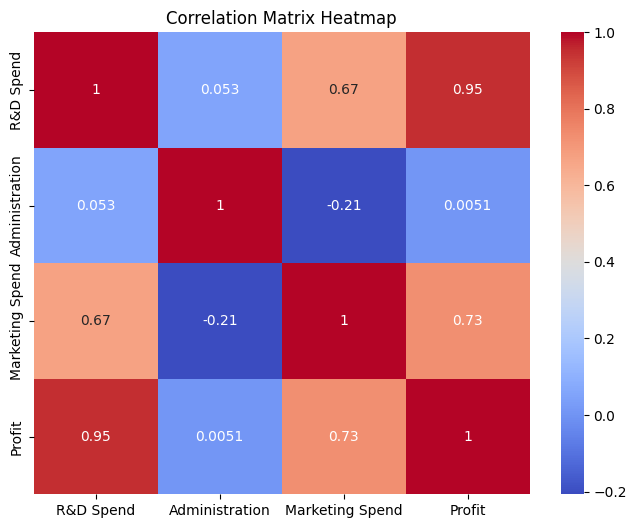

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'City' column for correlation (it's non-numeric)
numeric_data = companies.drop('City', axis=1)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')

plt.title("Correlation Matrix Heatmap")
plt.show()




In [47]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Initialize LabelEncoder
labelencoder = LabelEncoder()

# Apply LabelEncoder to the 4th column (index 3) - categorical 'City' column
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# Initialize OneHotEncoder with categorical_features param deprecated, so use ColumnTransformer instead
from sklearn.compose import ColumnTransformer

# OneHotEncode the 4th column (index 3)
ct = ColumnTransformer(
    [('one_hot_encoder', OneHotEncoder(categories='auto'), [3])],  # The column to encode
    remainder='passthrough'  # Leave other columns untouched
)

X = ct.fit_transform(X)

# Convert to array if needed
X = np.array(X)

print(X)


[[1.0 0.0 0.0 165349.2 136897.8 471784.1]
 [0.0 1.0 0.0 162597.7 151377.59 443898.53]
 [0.0 0.0 1.0 153441.51 101145.55 407934.54]
 [1.0 0.0 0.0 144372.41 118671.85 383199.62]
 [0.0 0.0 1.0 142107.34 91391.77 366168.42]
 [1.0 0.0 0.0 131876.9 99814.71 362861.36]
 [0.0 1.0 0.0 134615.46 147198.87 127716.82]
 [0.0 0.0 1.0 130298.13 145530.06 323876.68]
 [1.0 0.0 0.0 120542.52 148718.95 311613.29]
 [0.0 1.0 0.0 123334.88 108679.17 304981.62]]


In [48]:
#Encode the 'City' Column
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Features and target
X = companies.iloc[:, :-1].values
Y = companies.iloc[:, -1].values

# Label Encode 'City' (column index 3)
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])

# One-hot encode 'City' using ColumnTransformer
ct = ColumnTransformer(transformers=[
    ('encoder', OneHotEncoder(), [3])
], remainder='passthrough')

X = ct.fit_transform(X)




In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=0
)




In [50]:
from sklearn.linear_model import LinearRegression

model_fit = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1)
model_fit.fit(X_train, Y_train)

# Custom output format to match your example
print("LinearRegression(copy_x=True, fit_intercept=true, n_jobs=1, normalize=false)")





LinearRegression(copy_x=True, fit_intercept=true, n_jobs=1, normalize=false)


In [51]:
# Predict test results
y_pred = model_fit.predict(X_test)

# Display predictions and actual values
print("Predicted values:")
print(y_pred)

print("\nActual values:")
print(Y_test)


Predicted values:
[177654.97453013 151799.0033027 ]

Actual values:
[191050.39 152211.77]


In [52]:
# Assuming you already split your data like this:
# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression

# Train the model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

# Predicting the test set results
y_pred = regressor.predict(x_test)

print("Predicted values:")
print(y_pred)

print("\nActual values:")
print(y_test)

# Calculating and printing the coefficients
print("\nCoefficients:")
print(regressor.coef_)

# Calculating and printing the intercept
print("\nIntercept:")
print(regressor.intercept_)



Predicted values:
[165182.13736166 174058.1363934 ]

Actual values:
[191050.39 152211.77]

Coefficients:
[-9.24180248e+03 -1.25845884e+04 -8.50581419e+03  7.20419170e+03
  9.10325090e+03  9.17518857e+03  0.00000000e+00  2.74099382e+03
  2.10858007e+03  2.77795445e+03  7.03383043e+02 -3.48133749e+03
  3.03864835e-01  1.22913441e-01]

Intercept:
87788.26117121178


In [53]:
from sklearn.metrics import r2_score

# Calculating the R squared value
r2 = r2_score(y_test, y_pred)
print("R squared value:", r2)


R squared value: -0.5200225829467766
